In [66]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
from collections import Counter
sns.set_style('darkgrid')
from imblearn.pipeline import Pipeline
from dataprep.eda import plot, plot_correlation, plot_missing, create_report
import plotly.express as px
from plotly.offline import plot as off
import plotly.figure_factory as ff
import plotly.io as pio
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, scale
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score, \
                                    train_test_split, RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')
from keras.optimizers import Adam
from kerastuner.tuners import RandomSearch
from tensorflow.keras import layers
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.constraints import maxnorm
from keras.wrappers.scikit_learn import KerasRegressor, KerasClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

In [67]:
df = pd.read_csv("gas_turbines.csv")
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
14020,16.1900,1025.5,63.856,3.1972,18.875,1054.8,549.87,109.20,10.540,3.6947,75.209
14021,15.8350,1025.5,63.397,3.7645,23.057,1080.4,550.16,128.14,11.693,2.3615,75.847
14022,14.6840,1025.5,68.801,4.1049,25.665,1096.5,550.04,140.91,12.295,1.0665,80.408
14023,13.5020,1025.6,72.476,3.8622,24.095,1087.4,550.30,134.40,11.949,1.2706,76.284


# EDA

In [68]:
df.isnull().any()

AT      False
AP      False
AH      False
AFDP    False
GTEP    False
TIT     False
TAT     False
TEY     False
CDP      True
CO       True
NOX      True
dtype: bool

In [69]:
df.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     1
CO      1
NOX     1
dtype: int64

In [70]:
d = df[df["CDP"].isnull()].index
d

Int64Index([14024], dtype='int64')

In [71]:
dd = df[df["CO"].isnull()].index
dd

Int64Index([14024], dtype='int64')

In [72]:
df = df.drop(d,axis=0)

In [73]:
# as there is only one column has null value so we remove it

In [74]:
df.reset_index()

,index,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...,...
14019,14019,15.9870,1025.8,65.044,3.2258,18.964,1055.4,549.87,109.60,10.586,3.2840,74.661
14020,14020,16.1900,1025.5,63.856,3.1972,18.875,1054.8,549.87,109.20,10.540,3.6947,75.209
14021,14021,15.8350,1025.5,63.397,3.7645,23.057,1080.4,550.16,128.14,11.693,2.3615,75.847
14022,14022,14.6840,1025.5,68.801,4.1049,25.665,1096.5,550.04,140.91,12.295,1.0665,80.408


In [75]:
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
14019,15.9870,1025.8,65.044,3.2258,18.964,1055.4,549.87,109.60,10.586,3.2840,74.661
14020,16.1900,1025.5,63.856,3.1972,18.875,1054.8,549.87,109.20,10.540,3.6947,75.209
14021,15.8350,1025.5,63.397,3.7645,23.057,1080.4,550.16,128.14,11.693,2.3615,75.847
14022,14.6840,1025.5,68.801,4.1049,25.665,1096.5,550.04,140.91,12.295,1.0665,80.408


In [76]:
df.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [77]:
#Checking the data types
df.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

In [78]:
#Unique values for every feature
df.nunique()

AT      11391
AP        508
AH      11952
AFDP    10742
GTEP     7931
TIT       687
TAT      2279
TEY      4045
CDP      3545
CO      12360
NOX     11296
dtype: int64

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14024 entries, 0 to 14023
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      14024 non-null  float64
 1   AP      14024 non-null  float64
 2   AH      14024 non-null  float64
 3   AFDP    14024 non-null  float64
 4   GTEP    14024 non-null  float64
 5   TIT     14024 non-null  float64
 6   TAT     14024 non-null  float64
 7   TEY     14024 non-null  float64
 8   CDP     14024 non-null  float64
 9   CO      14024 non-null  float64
 10  NOX     14024 non-null  float64
dtypes: float64(11)
memory usage: 1.2 MB


In [80]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AT,14024.0,18.236190,7.568688,0.522300,12.052250,18.95950,24.259250,34.9290
AP,14024.0,1012.813982,6.142774,985.850000,1008.800000,1012.60000,1016.400000,1031.8000
AH,14024.0,78.810582,13.981224,30.344000,69.080500,82.08700,89.907250,100.2000
AFDP,14024.0,4.204706,0.771718,2.087400,3.721275,4.20255,4.559525,7.6106
GTEP,14024.0,25.487714,4.160264,17.878000,23.364000,25.22200,27.507000,37.4020
TIT,14024.0,1084.121028,16.345393,1009.500000,1080.575000,1089.20000,1096.600000,1100.8000
TAT,14024.0,545.452287,7.789176,513.060000,542.217500,549.89000,550.060000,550.6100
TEY,14024.0,134.247286,15.825868,100.830000,128.465000,133.79000,142.025000,174.6100
CDP,14024.0,12.113789,1.100822,9.904400,11.655750,12.04900,12.672250,15.0810
CO,14024.0,1.928853,2.146188,0.000388,0.832008,1.36165,2.139750,44.1030


The features are not on the same scale. For example AP has a mean of 1013.19 and CO has a mean value of 1.97. Features should be on the same scale for algorithms such as (gradient descent) to converge smoothly.
as gradient descent is used in neural network

In [81]:
corr = df[df.columns].corr()

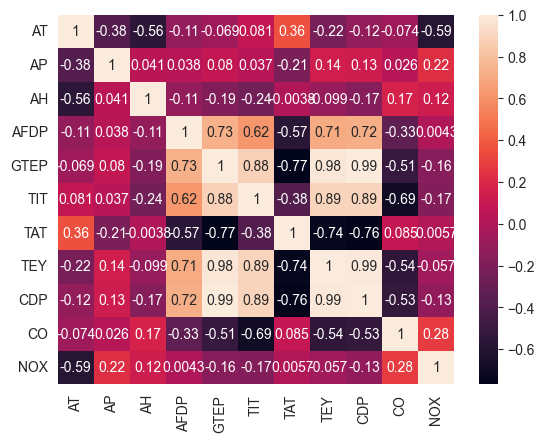

In [82]:
sns.heatmap(corr,annot=True)
plt.show()

In [83]:
# TIT ,CDP,GTEP ,AFDP has very high positive corelation
# 
# CDP,TAT,GTEP has high corelation

In [84]:
 df.corr()["TEY"].sort_values(ascending=False)

TEY     1.000000
CDP     0.988680
GTEP    0.977765
TIT     0.893094
AFDP    0.707776
AP      0.142635
NOX    -0.057220
AH     -0.098984
AT     -0.224464
CO     -0.544519
TAT    -0.735569
Name: TEY, dtype: float64

# DATA visualization


In [85]:
numerical_features = df.describe(include=["int64","float64"]).columns
numerical_features

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

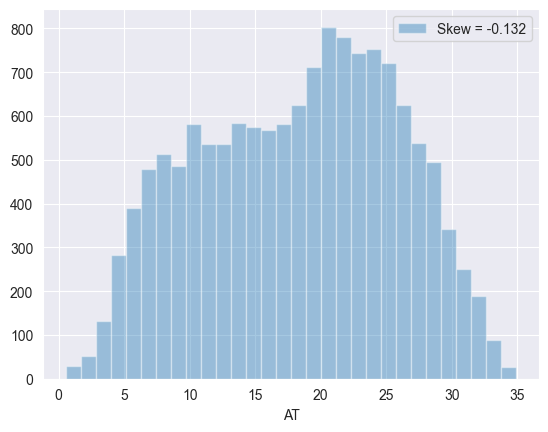

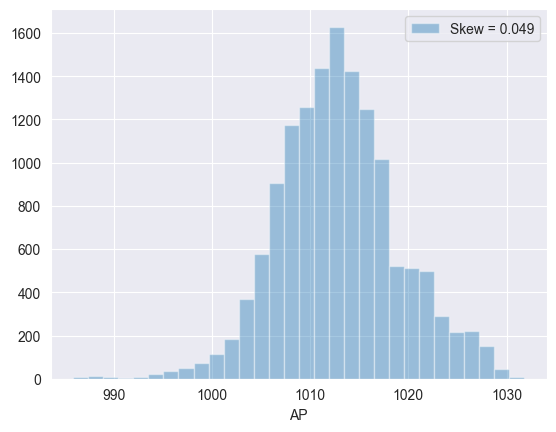

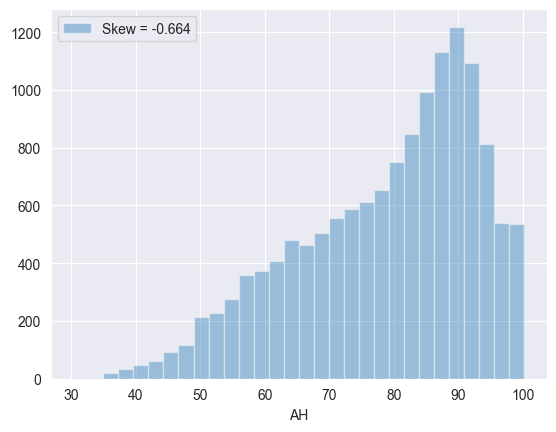

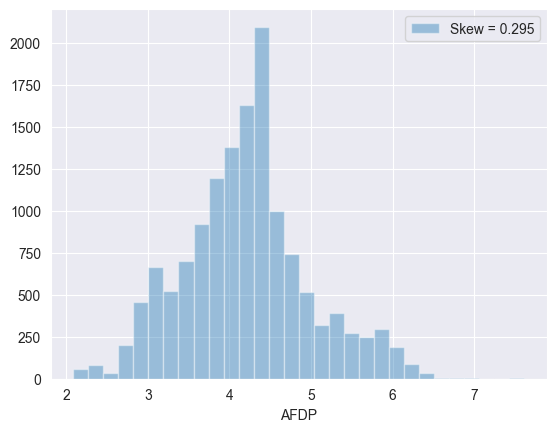

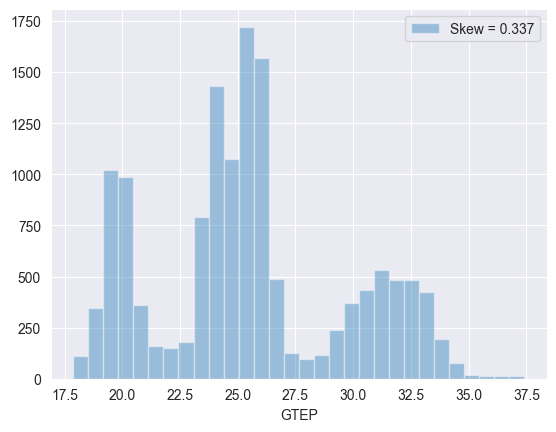

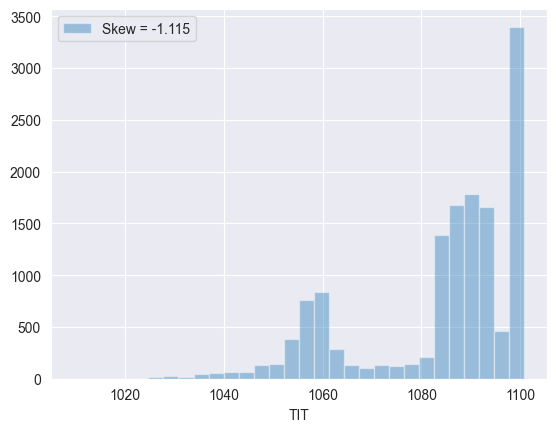

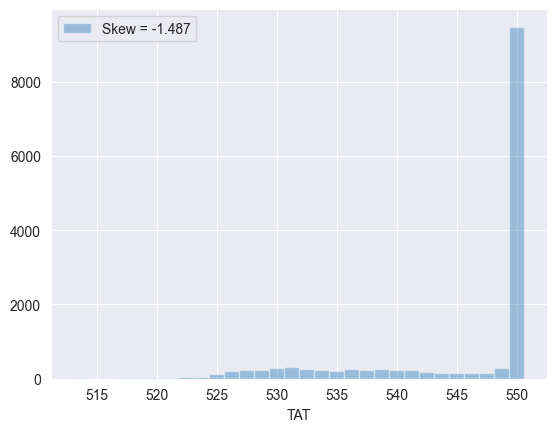

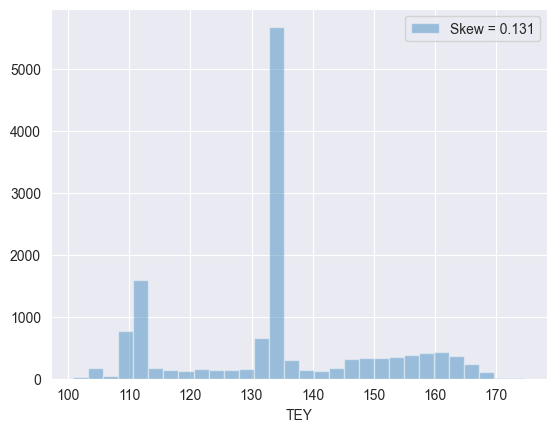

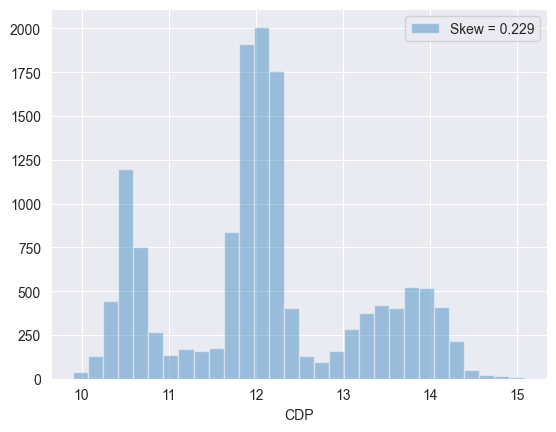

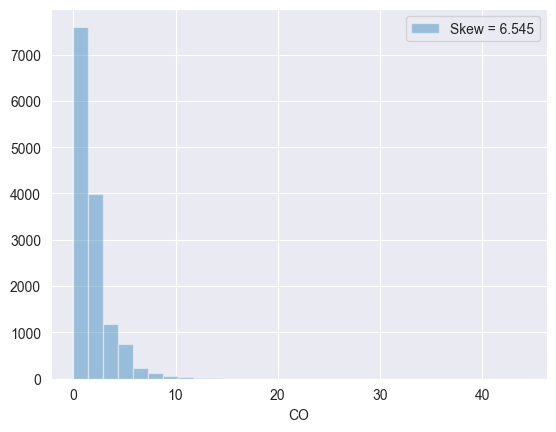

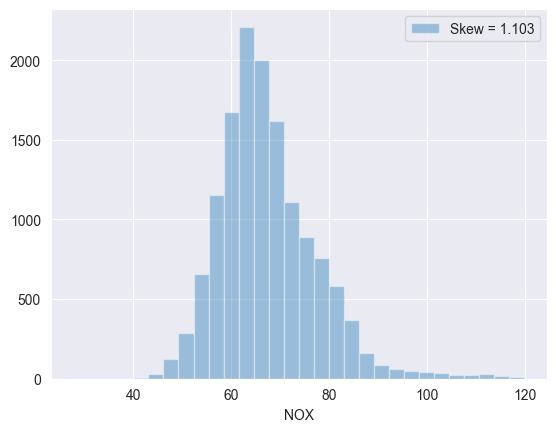

In [86]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes != 'O']
for i in numerical_features:
    skew = df[i].skew()
    sns.distplot(df[i], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

In [87]:
# Some of the features are normally distributed. The features AH, CO, TITy and TATa exhibit the 
# highest skew coefficients. Moreover, the distribution of Carbon Mono oxide (CO) and Turbine 
# inlet temperature (TIT) and Turbine after temperature (TAT)seem to contain many outliers.

In [88]:
import matplotlib.pyplot as plt

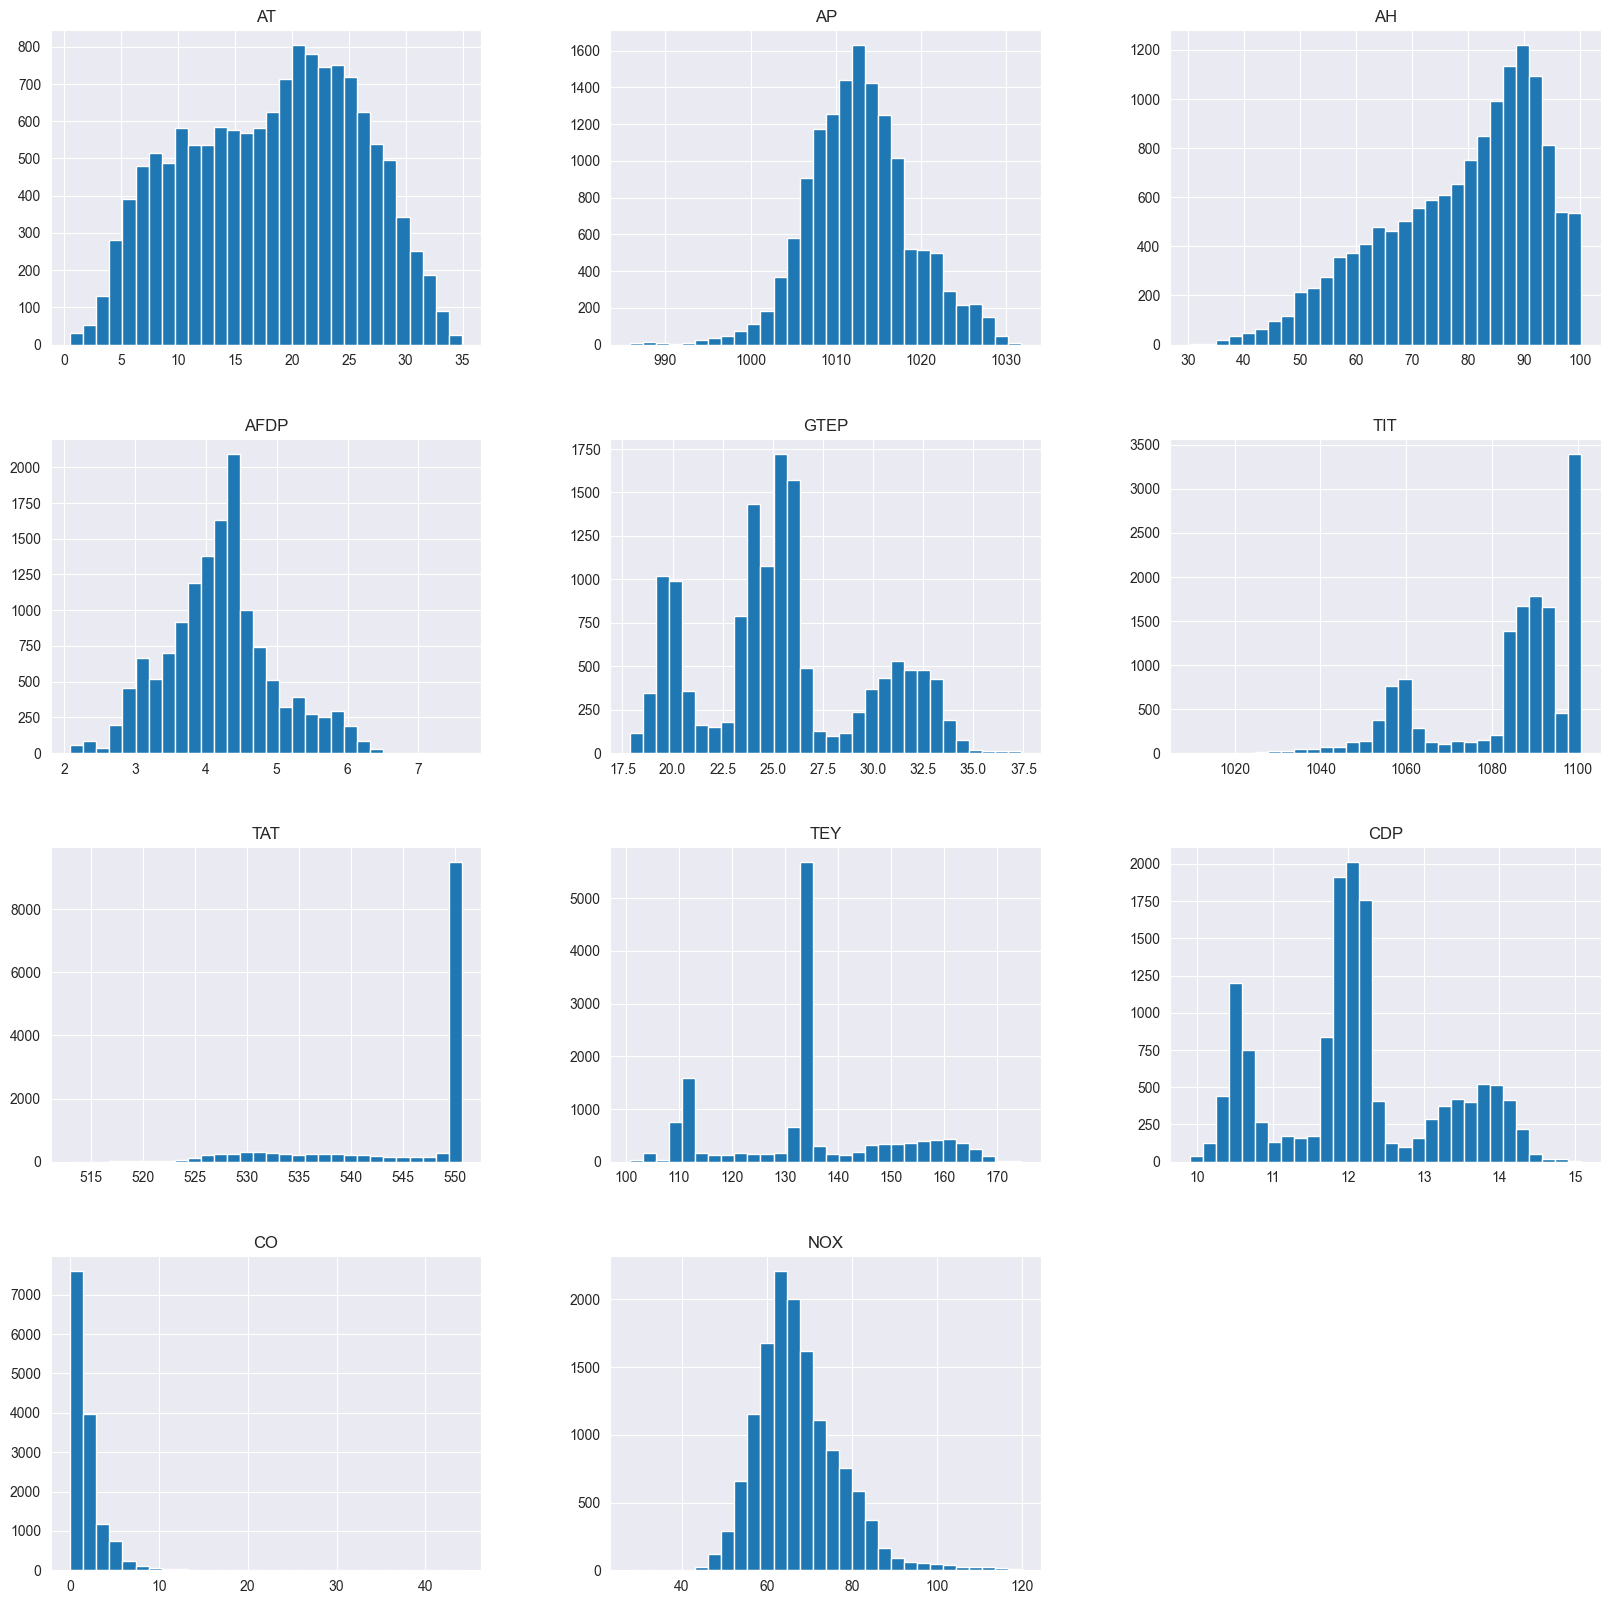

In [89]:
df.hist(bins = 30, figsize= (20, 20) )
plt.show()

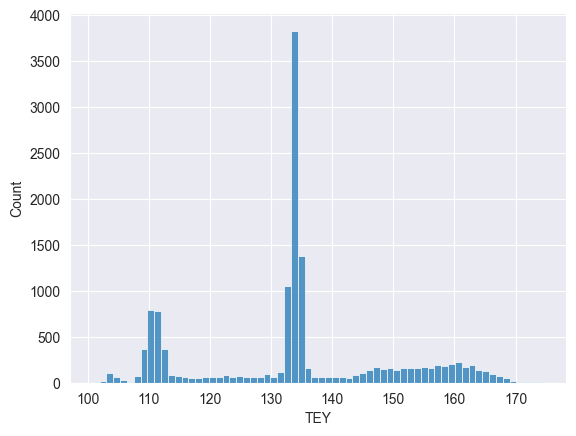

In [90]:
sns.histplot(df['TEY'])
plt.show()

In [91]:
# Detect observations with more than one outlier

def outlier_hunt(df):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than 2 outliers. 
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in df.columns.tolist():
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)#compute the q-th percentile of the data along the specified axis.

#Returns the q-th percentile(s) of the array elements.

        
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        
        # Interquartile rrange (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )
    
    return multiple_outliers   

print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(df[numerical_features])))) 

The dataset contains 965 observations with more than 2 outliers


In [92]:
# there are many outliers in the data

In [93]:
numerical_features

['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO', 'NOX']

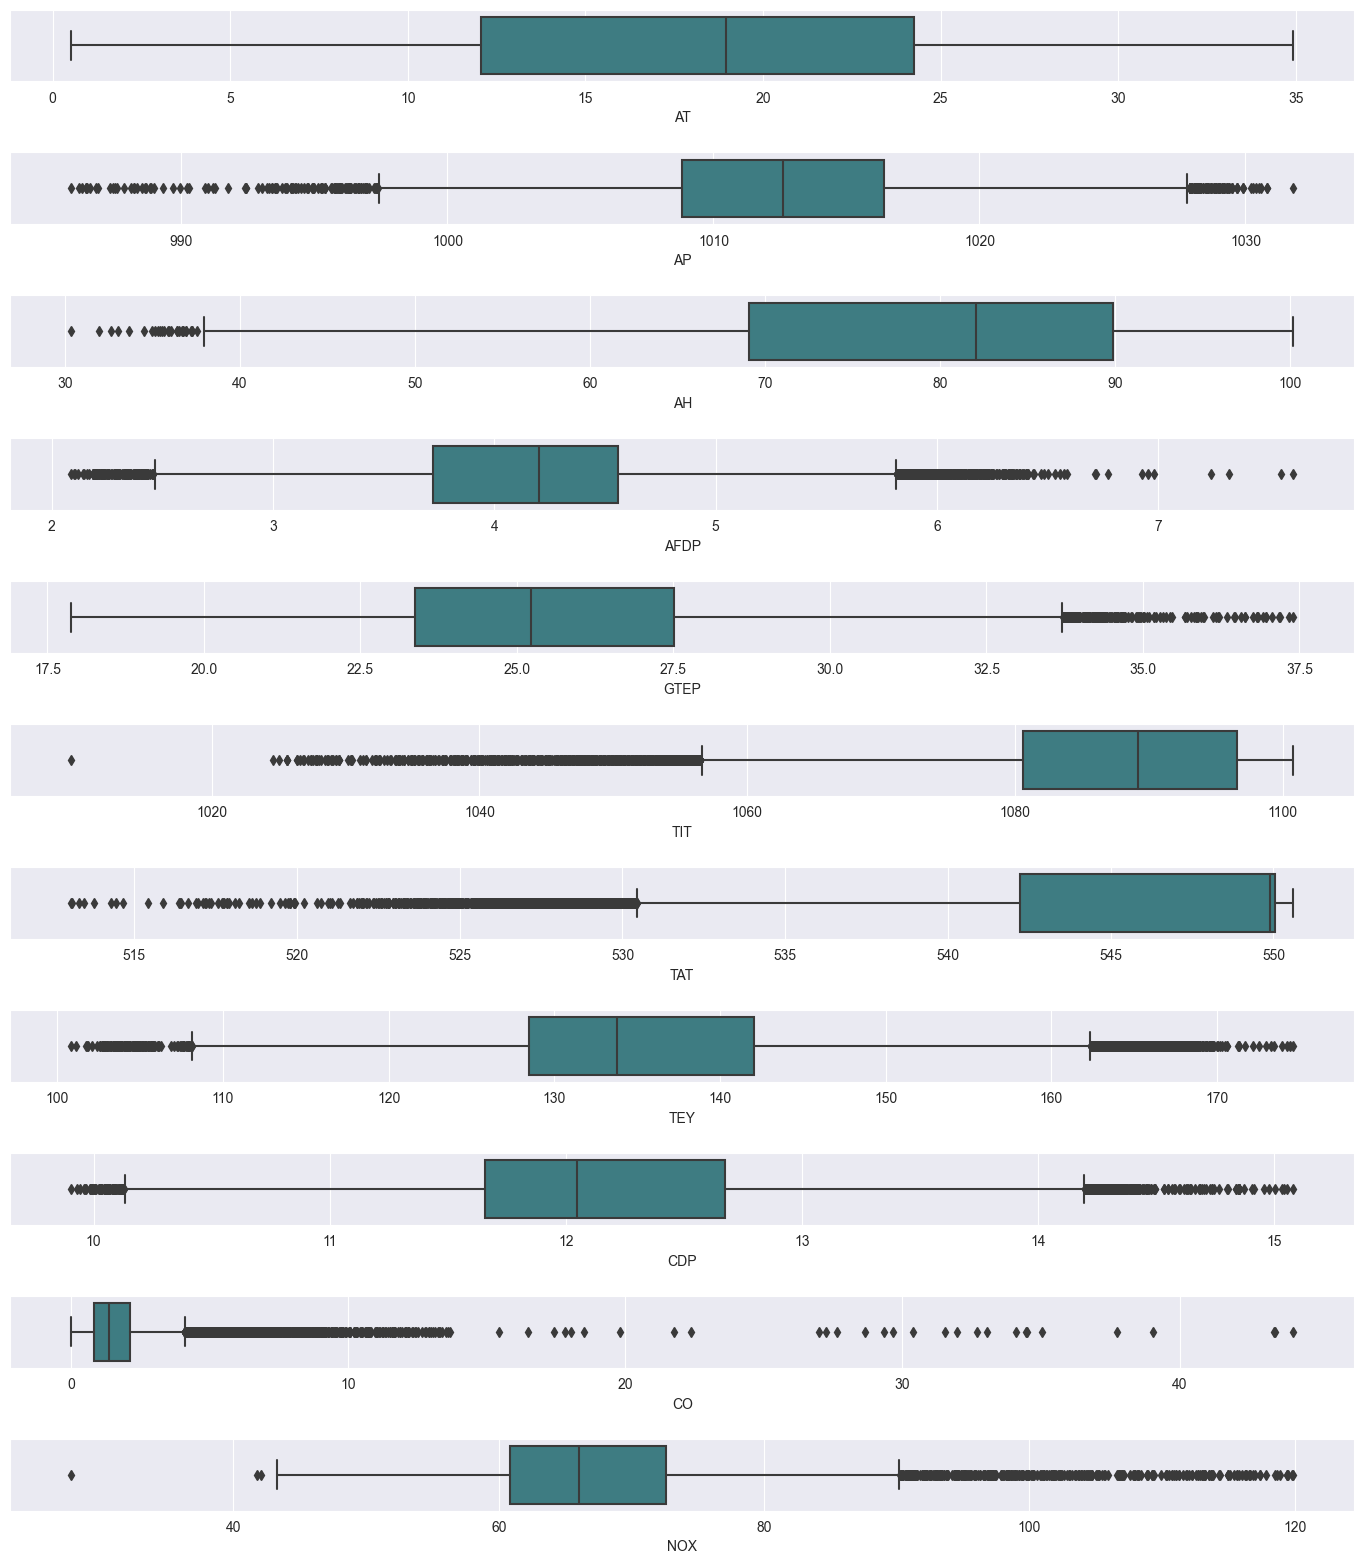

In [94]:
ot=df.copy() 
fig, axes=plt.subplots(11,1,figsize=(14,16),sharex=False,sharey=False)
sns.boxplot(x='AT',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='AP',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='AH',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='AFDP',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='GTEP',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='TIT',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='TAT',data=ot,palette='crest',ax=axes[6])
sns.boxplot(x='TEY',data=ot,palette='crest',ax=axes[7])
sns.boxplot(x='CDP',data=ot,palette='crest',ax=axes[8])
sns.boxplot(x='CO',data=ot,palette='crest',ax=axes[9])
sns.boxplot(x='NOX',data=ot,palette='crest',ax=axes[10])
plt.tight_layout(pad=2.0)

<AxesSubplot:>

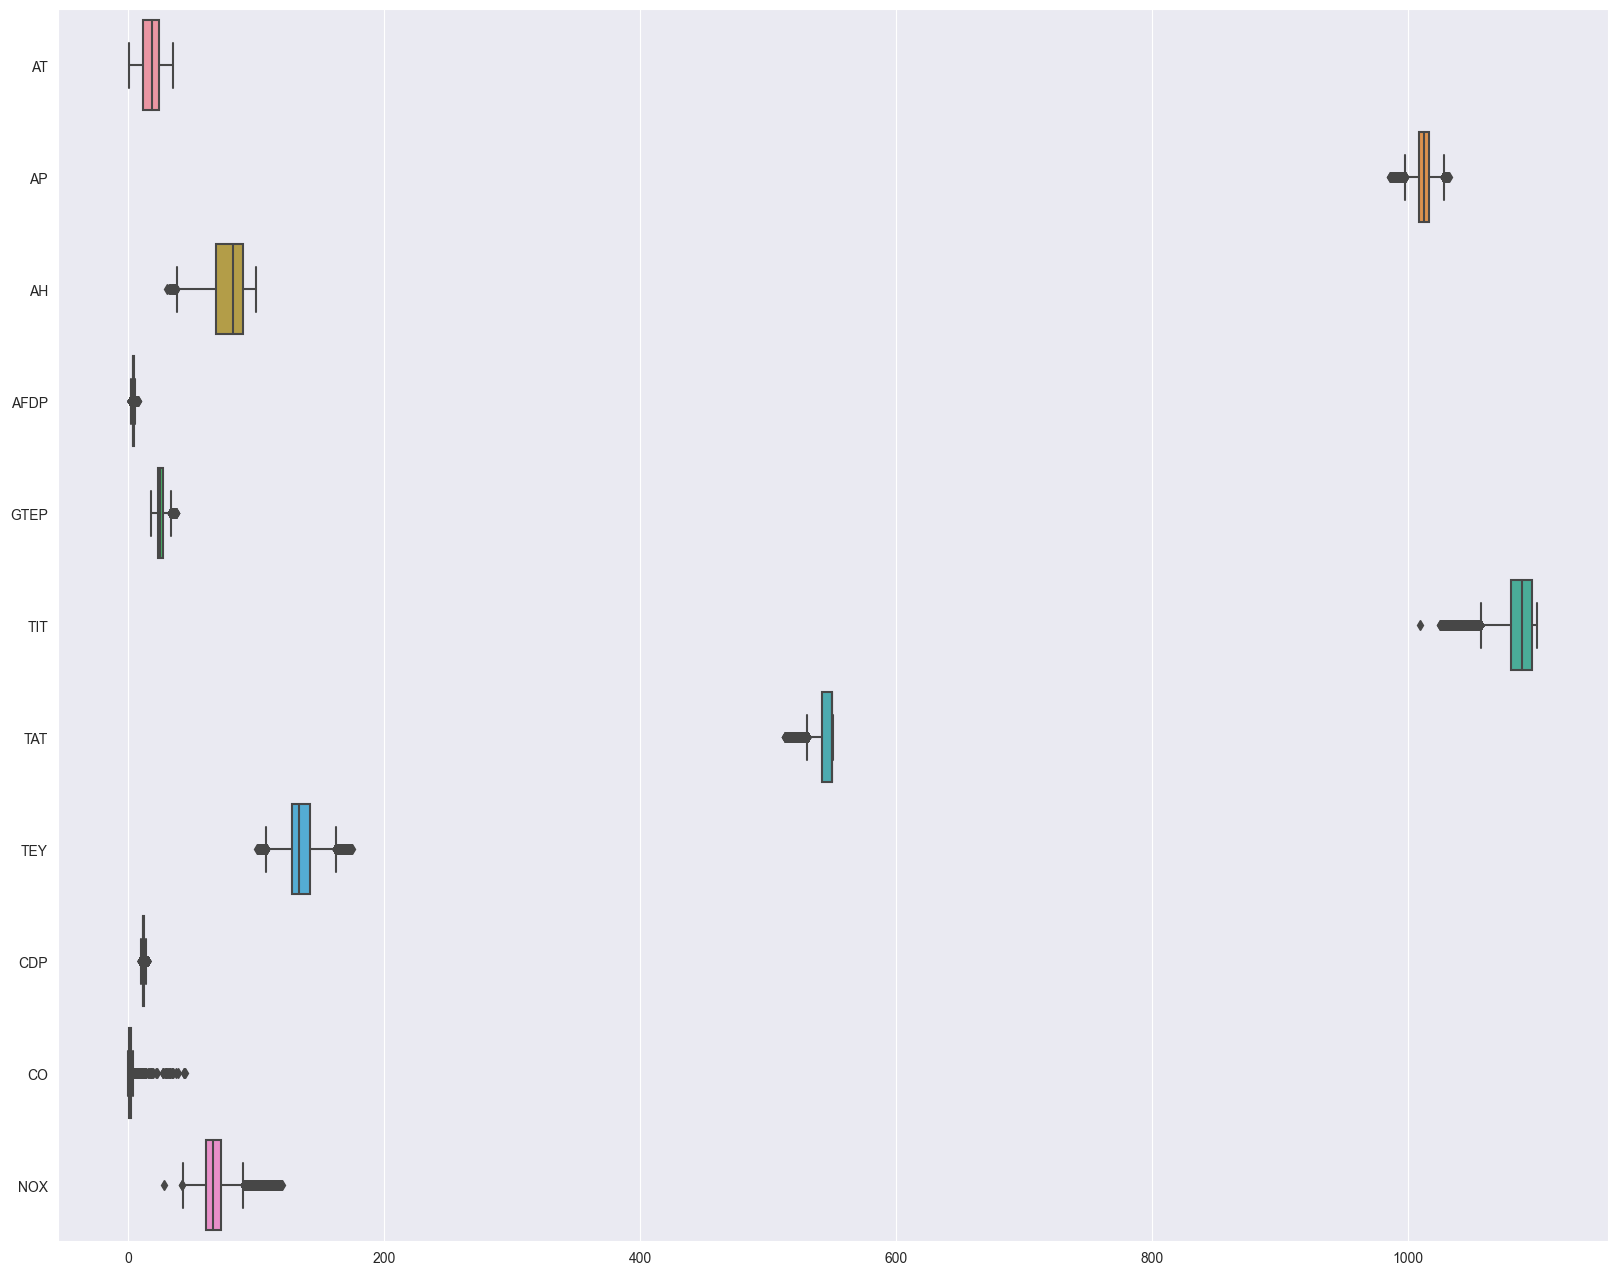

In [95]:
#outlier
plt.figure(figsize=(20,16))
sns.boxplot(data=df[numerical_features], orient="h")

Text(0.5, 1.0, 'Histogram of the Target Column')

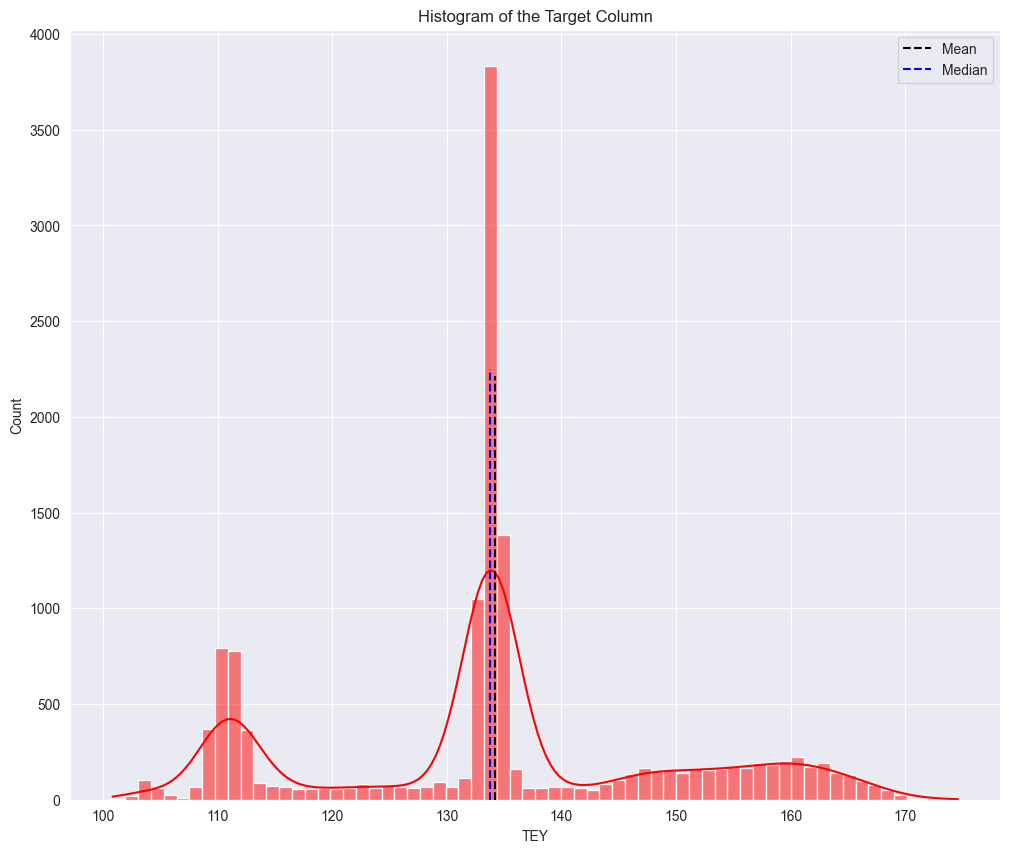

In [96]:
sns.set_style("darkgrid")
plt.figure(figsize=(12,10))
sns.histplot(data=df,x="TEY",color="red",kde=True)
plt.axvline(x=df["TEY"].mean(),ymax=0.55,color="black",linestyle='--',label="Mean")
plt.axvline(x=df["TEY"].median(),ymax=0.56,color="blue",linestyle='--',label="Median")
plt.legend()
plt.title("Histogram of the Target Column")

Text(0.5, 1.0, 'Cumulative of the Target Column')

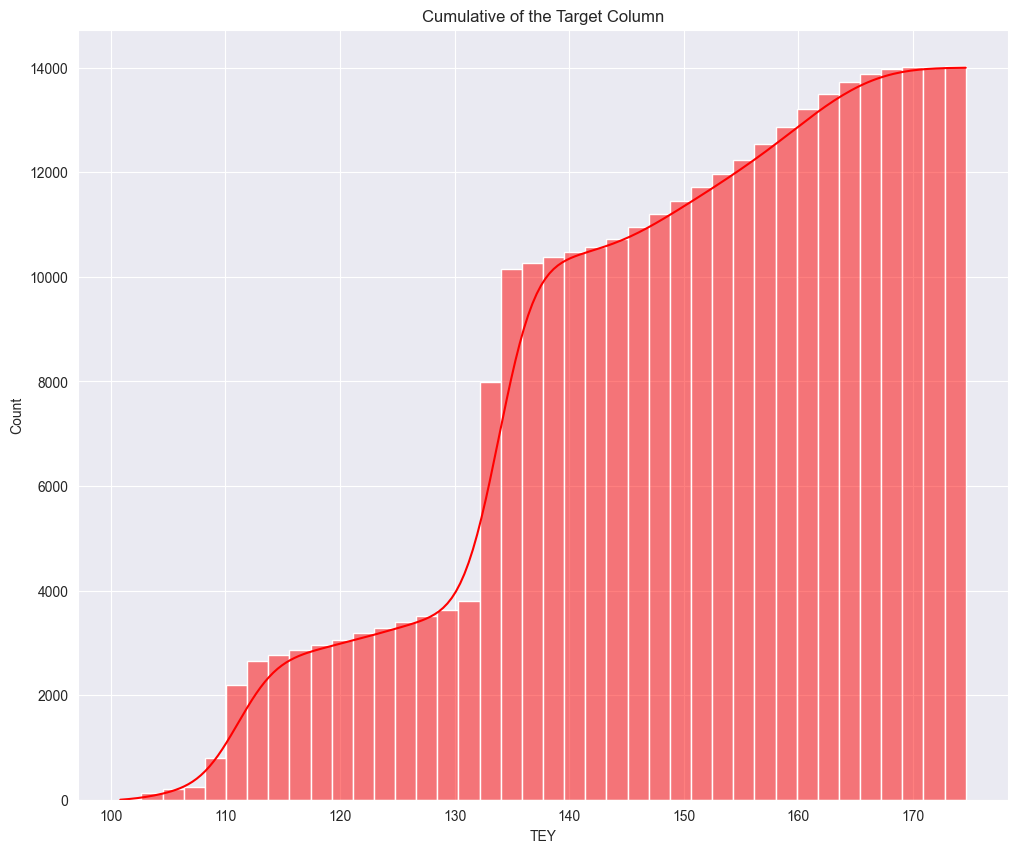

In [97]:
plt.figure(figsize = (12,10))
sns.histplot(df["TEY"],kde=True,bins=40,color="red",cumulative=True)
plt.title("Cumulative of the Target Column")

In [98]:
# most features are not on the same scale

In [99]:
# multivariate analysis

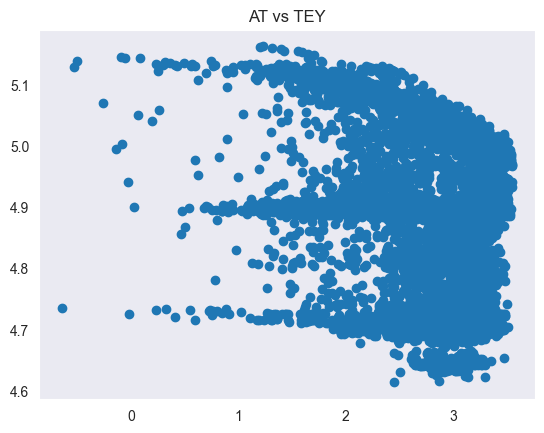

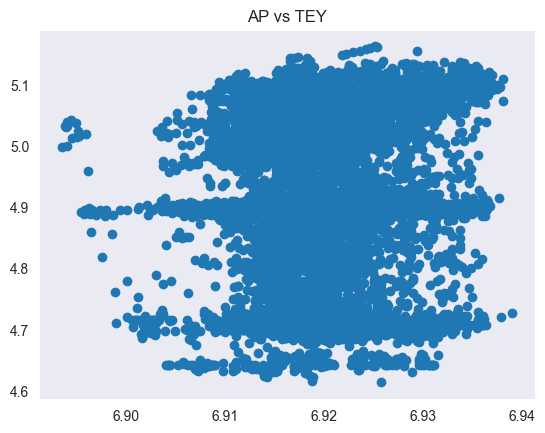

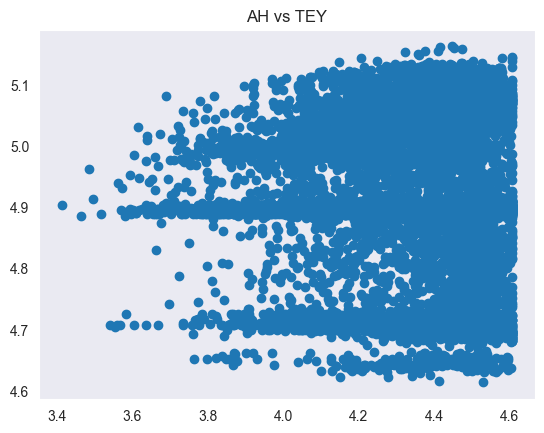

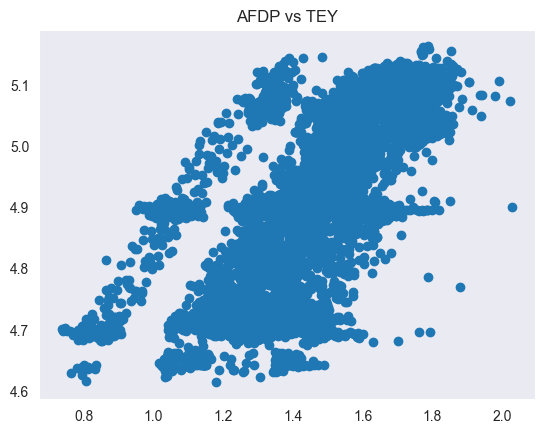

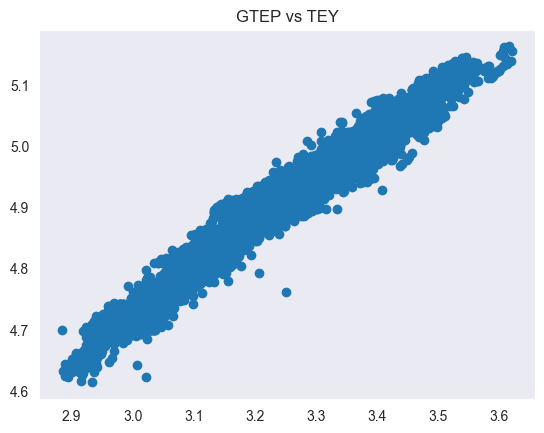

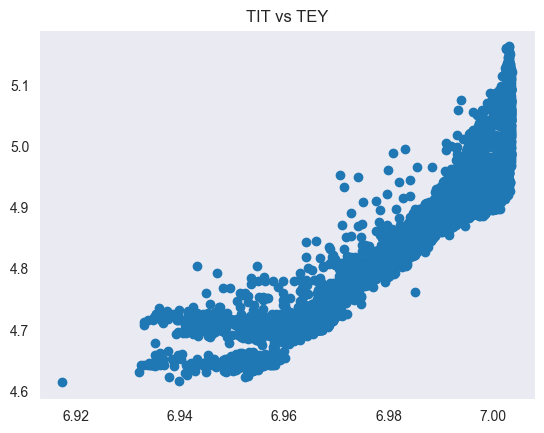

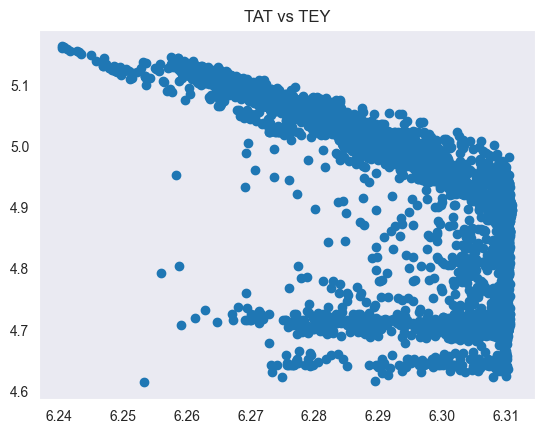

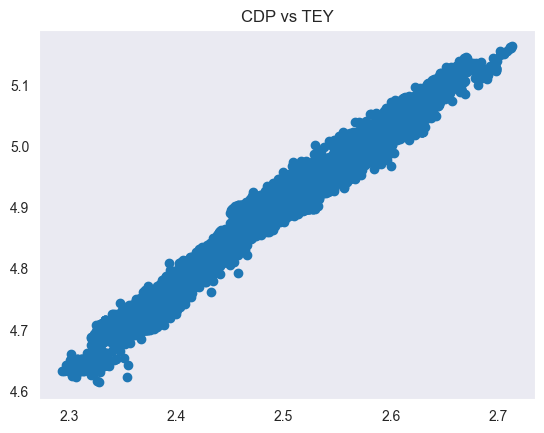

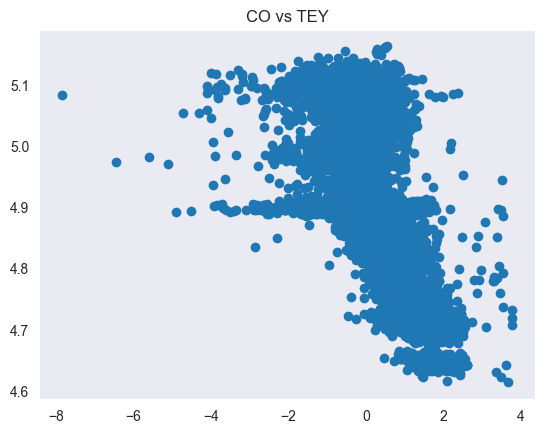

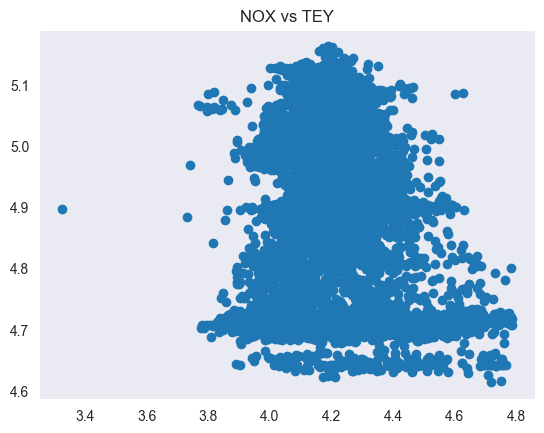

In [100]:
# pairplot
for i in df.columns:
    if i!="TEY": 
        plt.scatter(np.log(df[i]), np.log(df['TEY']))
        plt.title(i+ ' vs TEY')
        plt.grid()
        plt.show()

In [101]:
import matplotlib.pyplot as plt

<AxesSubplot:>

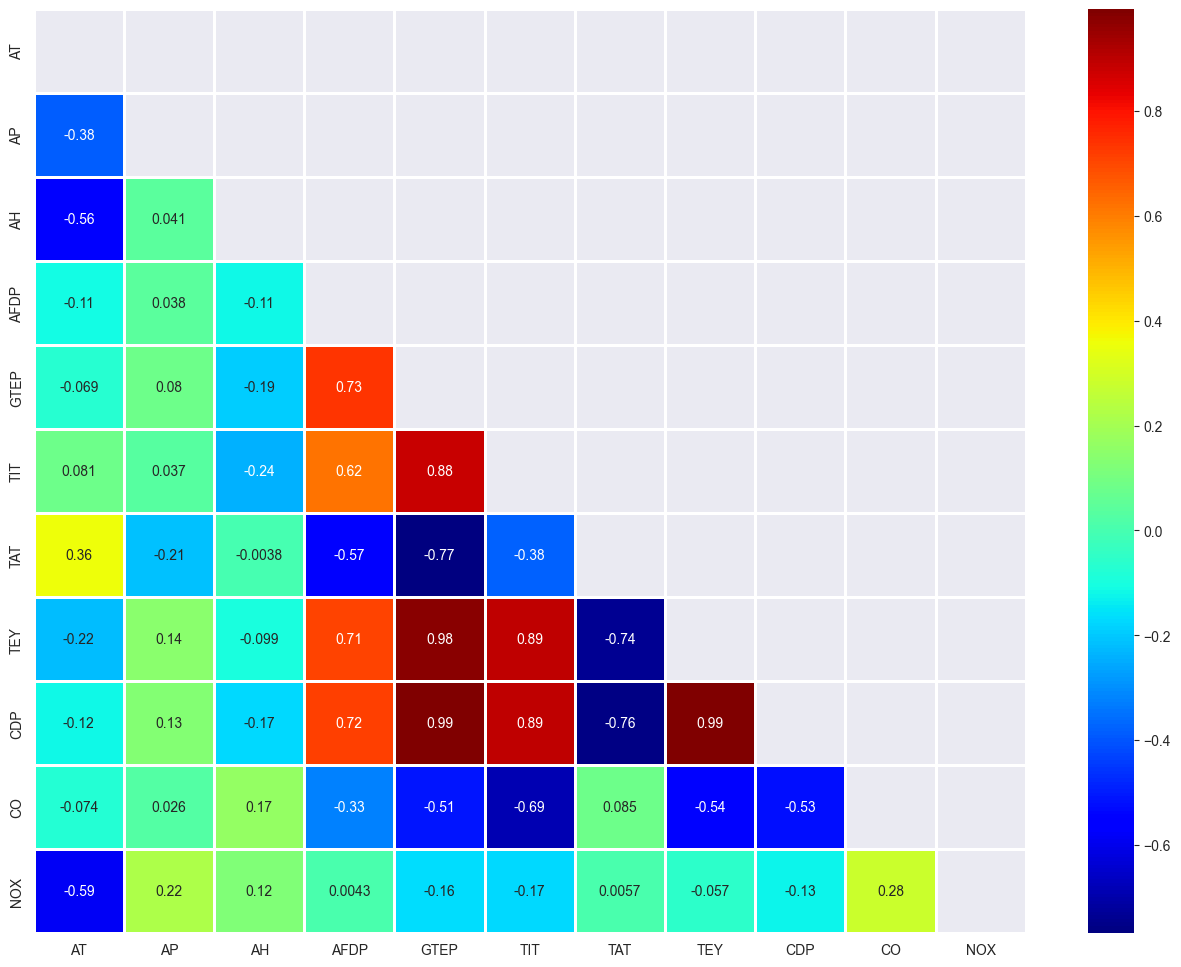

In [102]:
# Having a look at the correlation matrix

plt.figure(figsize=(16,12))
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data=df.corr(), cmap="jet", annot=True,linewidths=1, linecolor='white',mask=mask)

Text(0.5, 1.0, 'Correlation with Turbine energy yield \n')

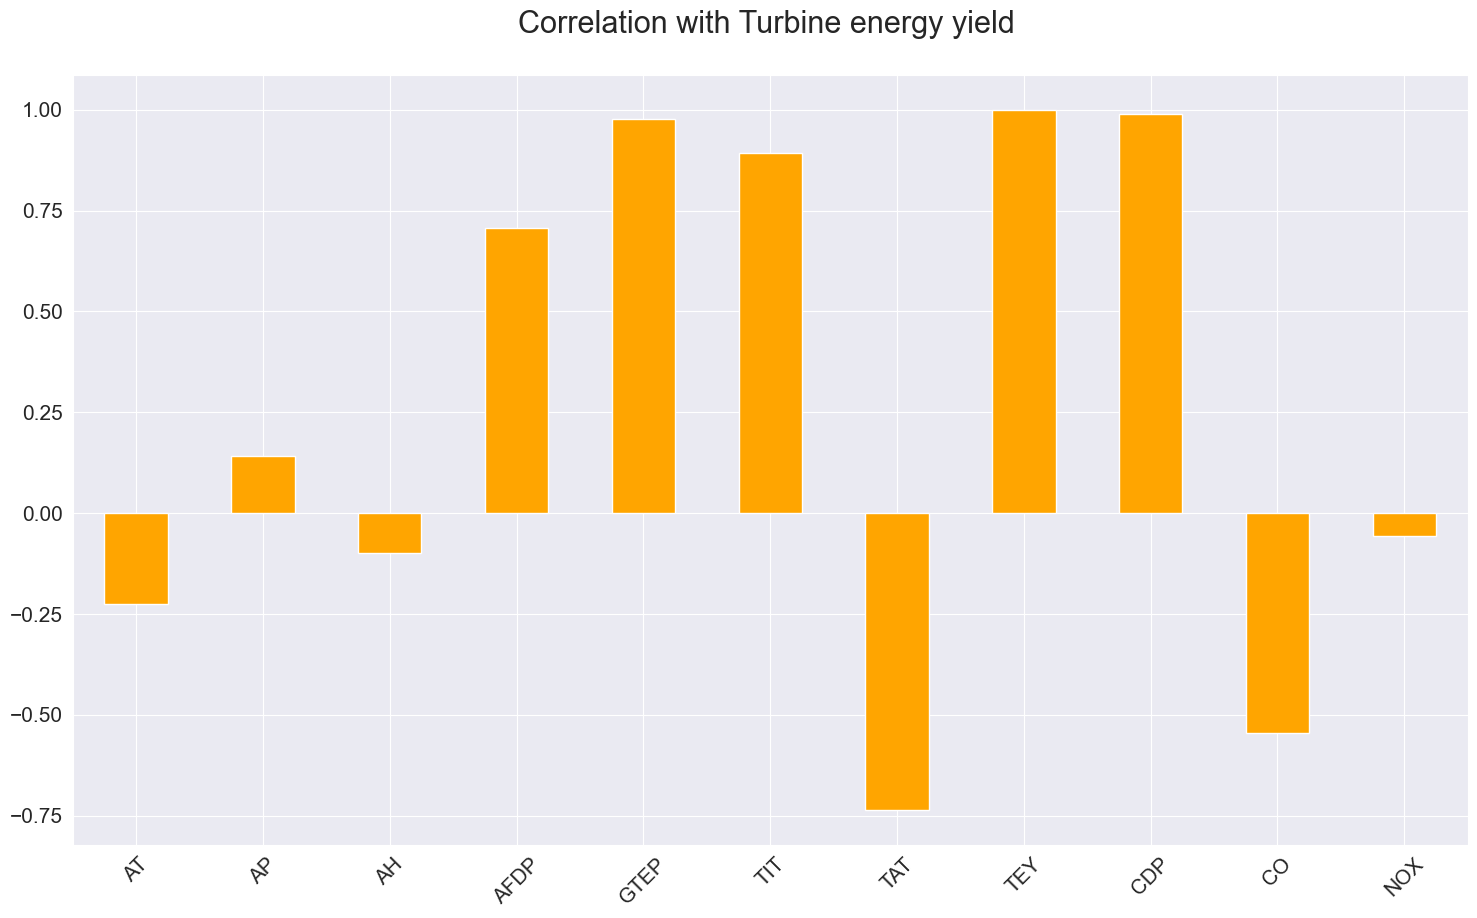

In [103]:
data2 = df.copy()

correlations = data2.corrwith(df.TEY)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations =correlations[correlations<0].sort_values(ascending = False)

correlations.plot.bar(
        figsize = (18, 10), 
        fontsize = 15, 
        color = 'orange',
        rot = 45, grid = True)
plt.title('Correlation with Turbine energy yield \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")

# Feature selection

In [104]:
#Feature importance
from numpy import set_printoptions

In [105]:
x = df.drop('TEY', axis=1)
y = df[["TEY"]]

In [106]:
# feature extraction
test = SelectKBest(score_func=mutual_info_regression, k='all')
fit = test.fit(x, y)

score_funccallable, default=f_classif
Function taking two arrays X and y, and returning a pair of arrays (scores, pvalues) 
or a single array with scores. Default is f_classif


f_classif
ANOVA F-value between label/feature for classification tasks.

mutual_info_classif
Mutual information for a discrete target.

chi2
Chi-squared stats of non-negative features for classification tasks.

f_regression
F-value between label/feature for regression tasks.

mutual_info_regression
Mutual information for a continuous target.

SelectPercentile
Select features based on percentile of the highest scores.

SelectFpr
Select features based on a false positive rate test.

SelectFdr
Select features based on an estimated false discovery rate.

SelectFwe
Select features based on family-wise error rate.

GenericUnivariateSelect
Univariate feature selector with configurable mode.

In [107]:
# summarize scores
scores = fit.scores_

features = fit.transform(x)

In [108]:
score_df = pd.DataFrame(list(zip(scores, x.columns)),
               columns =['Score', 'Feature'])
score_df.sort_values(by="Score", ascending=False, inplace=True)
score_df

,Score,Feature
7,1.718079,CDP
4,1.615503,GTEP
5,1.337334,TIT
6,0.909263,TAT
3,0.654544,AFDP
8,0.497435,CO
0,0.434237,AT
9,0.292340,NOX
1,0.144343,AP
2,0.103964,AH


In [109]:
score_df = pd.DataFrame(list(zip(scores, x.columns)),
               columns =['Score', 'Feature'])
score_df.sort_values(by="Score", ascending=False, inplace=True)
score_df
# x = df.drop('TEY', axis=1) , so x.columns give the name of columns
#pd.DataFrame(data,columns=())

,Score,Feature
7,1.718079,CDP
4,1.615503,GTEP
5,1.337334,TIT
6,0.909263,TAT
3,0.654544,AFDP
8,0.497435,CO
0,0.434237,AT
9,0.292340,NOX
1,0.144343,AP
2,0.103964,AH


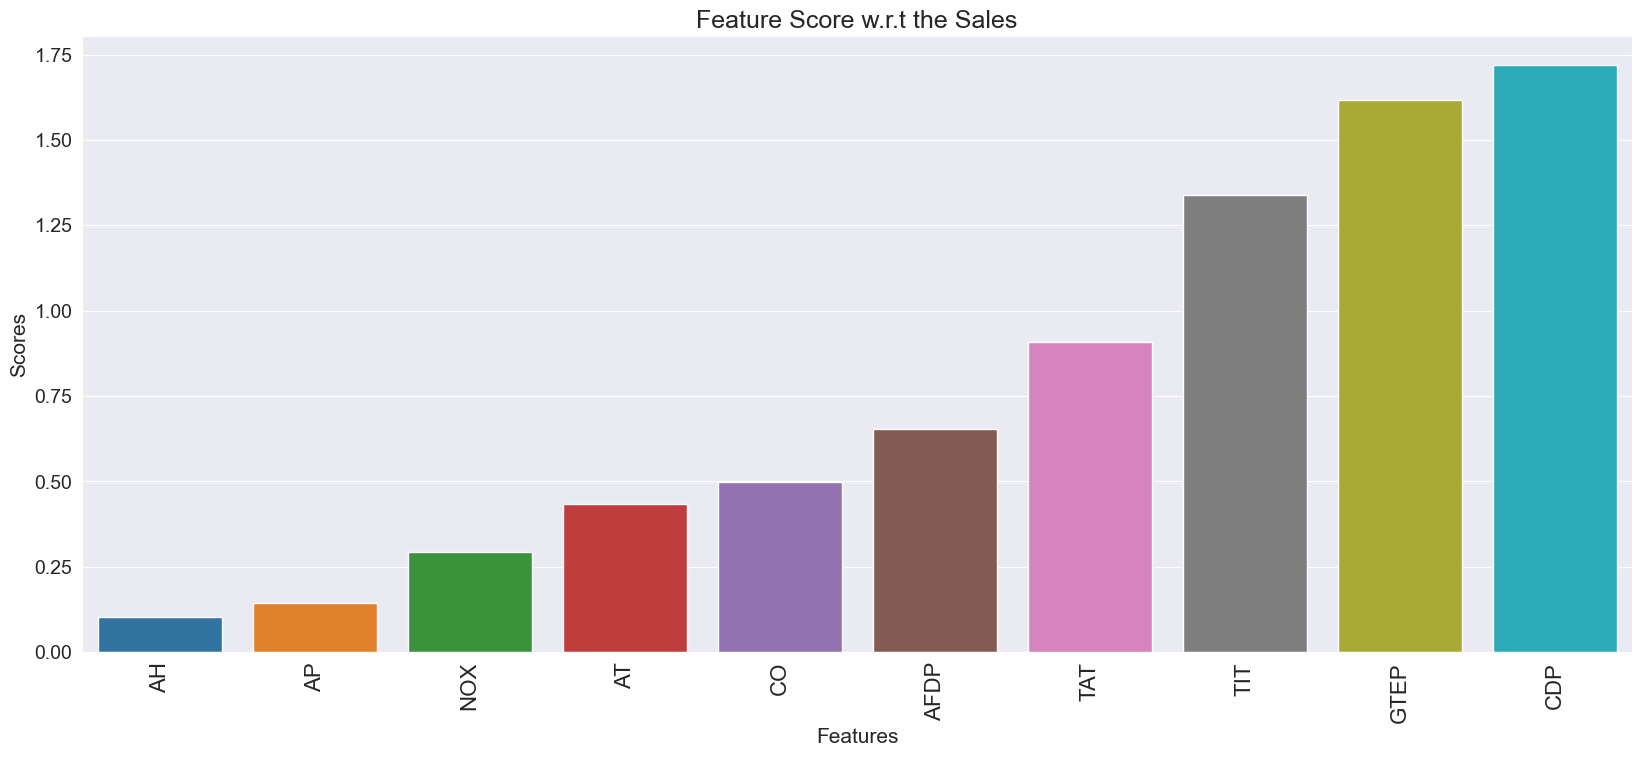

In [110]:
plt.figure(figsize=(20,8))
# make barplot and sort bars
sns.barplot(x='Feature',
            y="Score", 
            data=score_df, 
            order=score_df.sort_values('Score').Feature)
# set labels
plt.xlabel("Features", size=15)
plt.ylabel("Scores", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Feature Score w.r.t the Sales", size=18)
plt.show()

In [111]:
score_df.sort_values('Score',ascending=False)

,Score,Feature
7,1.718079,CDP
4,1.615503,GTEP
5,1.337334,TIT
6,0.909263,TAT
3,0.654544,AFDP
8,0.497435,CO
0,0.434237,AT
9,0.292340,NOX
1,0.144343,AP
2,0.103964,AH


In [112]:
model_data = df[['AP', 'NOX','TIT', 'TAT', 'AFDP', 'CO', 'AT',"TEY"]]
model_data.head()

,AP,NOX,TIT,TAT,AFDP,CO,AT,TEY
0,1007.9,82.722,1059.2,550.00,3.5000,3.1547,6.8594,114.70
1,1008.4,82.776,1059.3,550.00,3.4998,3.2363,6.7850,114.72
2,1008.8,82.468,1059.4,549.87,3.4824,3.2012,6.8977,114.71
3,1009.2,82.670,1059.6,549.99,3.4805,3.1923,7.0569,114.72
4,1009.7,82.311,1059.7,549.98,3.4976,3.2484,7.3978,114.72


# target and features

In [113]:
x = model_data.drop(['TEY'],axis=1).values
y = [model_data['TEY'].values]


# standard scaler

In [125]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
y = sc.fit_transform(y).T

In [126]:
x

array([[-0.79998988,  1.51145145, -1.52470587, ..., -0.91319716,
         0.57119435, -1.50319249],
       [-0.71859052,  1.5168099 , -1.51858772, ..., -0.91345633,
         0.60921661, -1.51302282],
       [-0.65347104,  1.48624691, -1.51246957, ..., -0.93600423,
         0.59286145, -1.49813199],
       ...,
       [ 2.06526738,  0.82924195, -0.22765809, ..., -0.57044321,
         0.20159565, -0.31726438],
       [ 2.06526738,  1.28183214,  0.75736405, ..., -0.12933379,
        -0.4018213 , -0.46934371],
       [ 2.08154725,  0.87260567,  0.20061241, ..., -0.44383807,
        -0.30671906, -0.62551901]])

In [127]:
y.shape

(14024, 1)

In [128]:
x.shape

(14024, 7)

# Now if we check the mean and standard deviation of our scaled data it should have a Mean '0' and Standard deviation '1'¶

In [129]:
continuous_feature=[feature for feature in model_data.columns if model_data[feature].dtype!='O']
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 8


In [130]:
df_standard_scaled = model_data.copy()
features = df_standard_scaled[continuous_feature]

In [131]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_standard_scaled[continuous_feature] = scaler.fit_transform(features.values)
df_standard_scaled.head()

,AP,NOX,TIT,TAT,AFDP,CO,AT,TEY
0,-0.799990,1.511451,-1.524706,0.583871,-0.913197,0.571194,-1.503192,-1.235192
1,-0.718591,1.516810,-1.518588,0.583871,-0.913456,0.609217,-1.513023,-1.233928
2,-0.653471,1.486247,-1.512470,0.567181,-0.936004,0.592861,-1.498132,-1.234560
3,-0.588352,1.506291,-1.500233,0.582587,-0.938466,0.588714,-1.477097,-1.233928
4,-0.506952,1.470668,-1.494115,0.581303,-0.916307,0.614855,-1.432055,-1.233928


Now if we check the mean and standard deviation of our scaled data it should have a Mean '0' and Standard deviation '1'

In [132]:
print('Mean' '\n',np.round(df_standard_scaled.mean(),1),'\n' 'Standard Devaition','\n',np.round(df_standard_scaled.std()),1)

Mean
 AP     -0.0
NOX     0.0
TIT     0.0
TAT    -0.0
AFDP   -0.0
CO     -0.0
AT      0.0
TEY     0.0
dtype: float64 
Standard Devaition 
 AP      1.0
NOX     1.0
TIT     1.0
TAT     1.0
AFDP    1.0
CO      1.0
AT      1.0
TEY     1.0
dtype: float64 1


In [133]:
X = df_standard_scaled.drop('TEY',axis=1)
Y = df_standard_scaled[['TEY']]


In [134]:
# Splitting data into test data and train data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3)

# 6. Hyperparameter Tuning

In [135]:
# batch size and epochs

In [140]:
# Importing the necessary packages
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam

In [141]:
# create model
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=7, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(7,kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    
    adam=Adam(lr=0.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [ ]:
# Create the model
model = KerasClassifier(build_fn = create_model,verbose = 0)
# Define the grid search parameters
batch_size = [10,20,40]
epochs = [10,50,100,150]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(X,Y)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START batch_size=10, epochs=10...................................
[CV 1/5; 1/12] END ....batch_size=10, epochs=10;, score=0.000 total time=   9.0s
[CV 2/5; 1/12] START batch_size=10, epochs=10...................................
[CV 2/5; 1/12] END ....batch_size=10, epochs=10;, score=0.000 total time=   7.8s
[CV 3/5; 1/12] START batch_size=10, epochs=10...................................
[CV 3/5; 1/12] END ....batch_size=10, epochs=10;, score=0.001 total time=   8.6s
[CV 4/5; 1/12] START batch_size=10, epochs=10...................................
[CV 4/5; 1/12] END ....batch_size=10, epochs=10;, score=0.000 total time=   8.5s
[CV 5/5; 1/12] START batch_size=10, epochs=10...................................
[CV 5/5; 1/12] END ....batch_size=10, epochs=10;, score=0.000 total time=   8.1s
[CV 1/5; 2/12] START batch_size=10, epochs=50...................................
[CV 1/5; 2/12] END ....batch_size=10, epochs=50;

In [139]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

NameError: name 'grid_result' is not defined